<a href="https://colab.research.google.com/github/hifistelija/Random_Fores_V3/blob/main/ML_Model_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [ ]:
df = pd.read_excel("ML_Määrät.xlsx")

In [ ]:
df.head()

,Kirjauspvm.,Linjakoodi,Päivän nimi,Varaukset,Nimikkeen nro,Kuvaus,Määrä,Perusmittayksikkö
0,2023-07-12,274,Keskiviikko,263.0,R02038,Juustoreissari itsetehty,3.0,KPL
1,2023-07-12,274,Keskiviikko,263.0,R00481,Kahvi iso,14.0,KPL
2,2023-07-12,274,Keskiviikko,263.0,R00339,Vesi kuuma,2.0,KPL
3,2023-07-12,274,Keskiviikko,263.0,R00025,Kahvi,43.0,KPL
4,2023-07-12,274,Keskiviikko,263.0,R00001,Santsikahvi,4.0,KPL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458980 entries, 0 to 458979
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kirjauspvm.        458980 non-null  datetime64[ns]
 1   Linjakoodi         458980 non-null  int64         
 2   Päivän nimi        458980 non-null  object        
 3   Varaukset          455773 non-null  float64       
 4   Nimikkeen nro      458980 non-null  object        
 5   Kuvaus             458980 non-null  object        
 6   Määrä              458970 non-null  float64       
 7   Perusmittayksikkö  458980 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [ ]:
df.isnull()

,Kirjauspvm.,Linjakoodi,Päivän nimi,Varaukset,Nimikkeen nro,Kuvaus,Määrä,Perusmittayksikkö
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
458975,False,False,False,False,False,False,False,False
458976,False,False,False,False,False,False,False,False
458977,False,False,False,False,False,False,False,False
458978,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Kirjauspvm.             0
Linjakoodi              0
Päivän nimi             0
Varaukset            3207
Nimikkeen nro           0
Kuvaus                  0
Määrä                  10
Perusmittayksikkö       0
dtype: int64

In [ ]:
100 * df.isnull().sum() / len(df)

Kirjauspvm.          0.000000
Linjakoodi           0.000000
Päivän nimi          0.000000
Varaukset            0.698723
Nimikkeen nro        0.000000
Kuvaus               0.000000
Määrä                0.002179
Perusmittayksikkö    0.000000
dtype: float64

In [ ]:
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan > 0].sort_values()
  return percent_nan

In [ ]:
percent_nan = percent_missing(df)

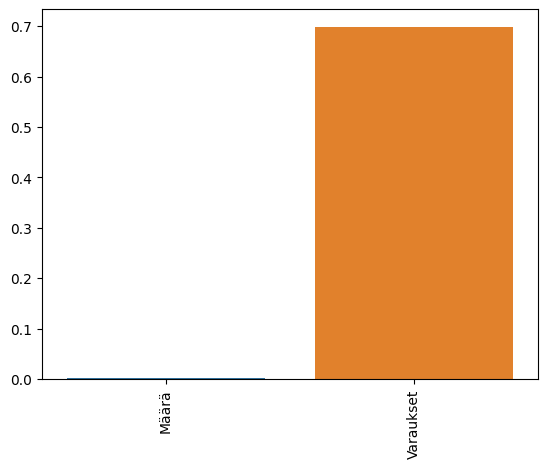

In [ ]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df[df["Varaukset"].isnull()]

,Kirjauspvm.,Linjakoodi,Päivän nimi,Varaukset,Nimikkeen nro,Kuvaus,Määrä,Perusmittayksikkö
4726,2023-07-12,276,Keskiviikko,NaN,R02038,Juustoreissari itsetehty,23.0,KPL
4727,2023-07-12,276,Keskiviikko,NaN,R02037,Juustosämpylä Glut.RV,1.0,KPL
4728,2023-07-12,276,Keskiviikko,NaN,R01871,Nordqvist Tee valikoima,2.0,KPL
4729,2023-07-12,276,Keskiviikko,NaN,R01847,Nordqvist Musta Tee,1.0,KPL
4730,2023-07-12,276,Keskiviikko,NaN,R01842,Kinkkureissari itsetehty RV,2.0,KPL
...,...,...,...,...,...,...,...,...
446478,2023-08-10,269,Torstai,NaN,100463,Riisipiirakka munavoi,3.0,KPL
446479,2023-08-10,269,Torstai,NaN,100365,A- luonnonjogurtti+marjamysli,16.0,KPL
446480,2023-08-10,269,Torstai,NaN,100359,"Kevytmaito lton 2,5 dl",1.0,KPL
446481,2023-08-10,269,Torstai,NaN,100332,Mansikkahillo Star Culin,1.0,KPL


In [ ]:
df[df["Määrä"].isnull()]

,Kirjauspvm.,Linjakoodi,Päivän nimi,Varaukset,Nimikkeen nro,Kuvaus,Määrä,Perusmittayksikkö
57004,2023-07-19,41,Keskiviikko,108.0,100610,Avoin ruoka,NaN,KPL
76880,2023-06-24,262,Lauantai,NaN,R00265,Kaurapuuro ja mustikat,NaN,ANNOS
76883,2023-06-24,262,Lauantai,NaN,K0455,"Double Kansi, tear tab 90mm",NaN,KPL
76884,2023-06-24,262,Lauantai,NaN,K0454,Double Kuumakuppi 360 ml,NaN,KPL
76885,2023-06-24,262,Lauantai,NaN,90276,"Palvelumaksu 1,00",NaN,KPL
81815,2023-05-27,54,Lauantai,305.0,R01181,RV. Isot lihapullat ja muusia,NaN,ANNOS
165406,2023-07-31,274,Maanantai,372.0,100610,Avoin ruoka,NaN,KPL
165407,2023-07-31,203,Maanantai,NaN,100610,Avoin ruoka,NaN,KPL
350431,2023-05-23,28,Tiistai,265.0,70080,Läkerol seasalt 25g,NaN,KPL
417766,2023-07-27,26,Torstai,403.0,100610,Avoin ruoka,NaN,KPL


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Kirjauspvm.          0
Linjakoodi           0
Päivän nimi          0
Varaukset            0
Nimikkeen nro        0
Kuvaus               0
Määrä                0
Perusmittayksikkö    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455768 entries, 0 to 458979
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kirjauspvm.        455768 non-null  datetime64[ns]
 1   Linjakoodi         455768 non-null  int64         
 2   Päivän nimi        455768 non-null  object        
 3   Varaukset          455768 non-null  float64       
 4   Nimikkeen nro      455768 non-null  object        
 5   Kuvaus             455768 non-null  object        
 6   Määrä              455768 non-null  float64       
 7   Perusmittayksikkö  455768 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.3+ MB


In [ ]:
df.groupby(["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).count()

Kirjauspvm.  Varaukset  Kuvaus  Määrä  \
Nimikkeen nro Päivän nimi Linjakoodi                                          
100006        Keskiviikko 5                     3          3       3      3   
                          8                     1          1       1      1   
                          9                     2          2       2      2   
                          10                    1          1       1      1   
                          11                    1          1       1      1   
...                                           ...        ...     ...    ...   
R02125        Maanantai   274                   2          2       2      2   
              Sunnuntai   265                   2          2       2      2   
                          276                   2          2       2      2   
              Tiistai     45                    1          1       1      1   
                          276                   1          1       1      1   

                                      Perusmittayksikkö  
Nimikkeen nro Päivän nimi Linjakoodi                     
100006        Keskiviikko 5                           3  
                          8                           1  
                          9                           2  
                          10                          1  
                          11                          1  
...                                                 ...  
R02125        Maanantai   274                         2  
              Sunnuntai   265                         2  
                          276                         2  
              Tiistai     45                          1  
                          276                         1  

[95238 rows x 5 columns]

In [ ]:
def replace_with_robust_zscore(df):
  median = df["Määrä"].median()
  mad = np.median(np.abs(df["Määrä"] - median))
  z_score = 0.6745 * (df["Määrä"] - median) / mad
  df["Määrä"] = np.where(np.abs(z_score) > 3, median, df["Määrä"])
  return df


df = df.groupby(
    ["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).apply(replace_with_robust_zscore)

<ipython-input-17-585034dd096e>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).apply(replace_with_robust_zscore)


In [ ]:
df.head()

,Kirjauspvm.,Linjakoodi,Päivän nimi,Varaukset,Nimikkeen nro,Kuvaus,Määrä,Perusmittayksikkö
0,2023-07-12,274,Keskiviikko,263.0,R02038,Juustoreissari itsetehty,3.0,KPL
1,2023-07-12,274,Keskiviikko,263.0,R00481,Kahvi iso,14.0,KPL
2,2023-07-12,274,Keskiviikko,263.0,R00339,Vesi kuuma,1.0,KPL
3,2023-07-12,274,Keskiviikko,263.0,R00025,Kahvi,43.0,KPL
4,2023-07-12,274,Keskiviikko,263.0,R00001,Santsikahvi,4.0,KPL


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df["Päivän nimi"] = le.fit_transform(df["Päivän nimi"])
df["Nimikkeen nro"] = le.fit_transform(df["Nimikkeen nro"])

In [ ]:
df.corr()["Määrä"].sort_values()

<ipython-input-22-90449da22c50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Määrä"].sort_values()


Linjakoodi      -0.108952
Päivän nimi      0.008871
Nimikkeen nro    0.089826
Varaukset        0.204710
Määrä            1.000000
Name: Määrä, dtype: float64

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="viridis")

# Train | Test & Holdout Sets

In [ ]:
X = df.drop(["Määrä", "Perusmittayksikkö",  "Kuvaus", "Kirjauspvm."], axis=1 )
y = df["Määrä"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) # Initial split

In [ ]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101) # Holdout set

# Model training and hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distributions = {
    "n_estimators": [10, 50, 100, 200, 500, 1000],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None] + list(np.arange(5, 51, 5)),
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "bootstrap": [True, False]
}

In [ ]:
n_iter_search = 100  # number of iterations for random search

In [ ]:
random_forest = RandomForestRegressor()

In [ ]:
random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_distributions,
    n_iter=n_iter_search,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="neg_mean_squared_error",
    random_state=42
    )

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
random_search.best_params_
# {'n_estimators': 1000,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': None,
#  'bootstrap': True}

{'n_estimators': 1000,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_validation)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae_rf = mean_absolute_error(y_validation, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_validation, y_pred_rf))

In [ ]:
mae_rf # 1.450426093632012

1.450426093632012

In [ ]:
rmse_rf # 2.7080643529131674

2.7080643529131674

In [ ]:
comparison_df_rf = pd.DataFrame({"Actual": y_validation, "Predicted rf": y_pred_rf})

In [ ]:
comparison_df_rf.to_excel("ML_määrien_vertailu_random_forest.xlsx", index=False)

# Final Hold Out Test Performance

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=15,
    min_samples_leaf=1,
    max_features=1.0,
    max_depth=None,
    bootstrap=True,
    random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=15, n_estimators=1000, random_state=42)

In [ ]:
test_predictions = rf_model.predict(X_holdout_test)

In [ ]:
mean_absolute_error(y_holdout_test, test_predictions)

1.4536332045148295

In [ ]:
np.sqrt(mean_squared_error(y_holdout_test, test_predictions))

2.7356195827466663

In [ ]:
# 1.4536332045148295 , 2.7356195827466663

In [ ]:
comparison_df_rf_final = pd.DataFrame({"Actual": y_validation, "Predicted rf": y_pred_rf})

In [ ]:
comparison_df_rf_final.to_excel("ML_määrien_vertailu_random_forest_final.xlsx", index=False)

# Full training

In [ ]:
final_model = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=15,
    min_samples_leaf=1,
    max_features=1.0,
    max_depth=None,
    bootstrap=True,
    random_state=42) # using best parameters founded in randomsearch

In [ ]:
final_model.fit(X, y)

# Saving Model

In [ ]:
# import joblib

In [ ]:
# joblib.dump(final_model, "final_model.pkl")

In [ ]:
# X.columns

In [ ]:
# list(X.columns)

In [ ]:
# joblib.dump(list(X.columns), "column_names.pkl")